/var/folders/rf/r785zb1d6vvc7r4lhhwz6t3h0000gq/T/ipykernel_79803/3386323978.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/var/folders/rf/r785zb1d6vvc7r4lhhwz6t3h0000gq/T/ipykernel_79803/3386323978.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/var/folders/rf/r785zb1d6vvc7r4lhhwz6t3h0000gq/T/ipykernel_79803/3386323978.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/var/folders/rf/r785zb1d6vvc7r4lhhwz6t3h0000gq/T/ipykernel_79803/3386323978.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


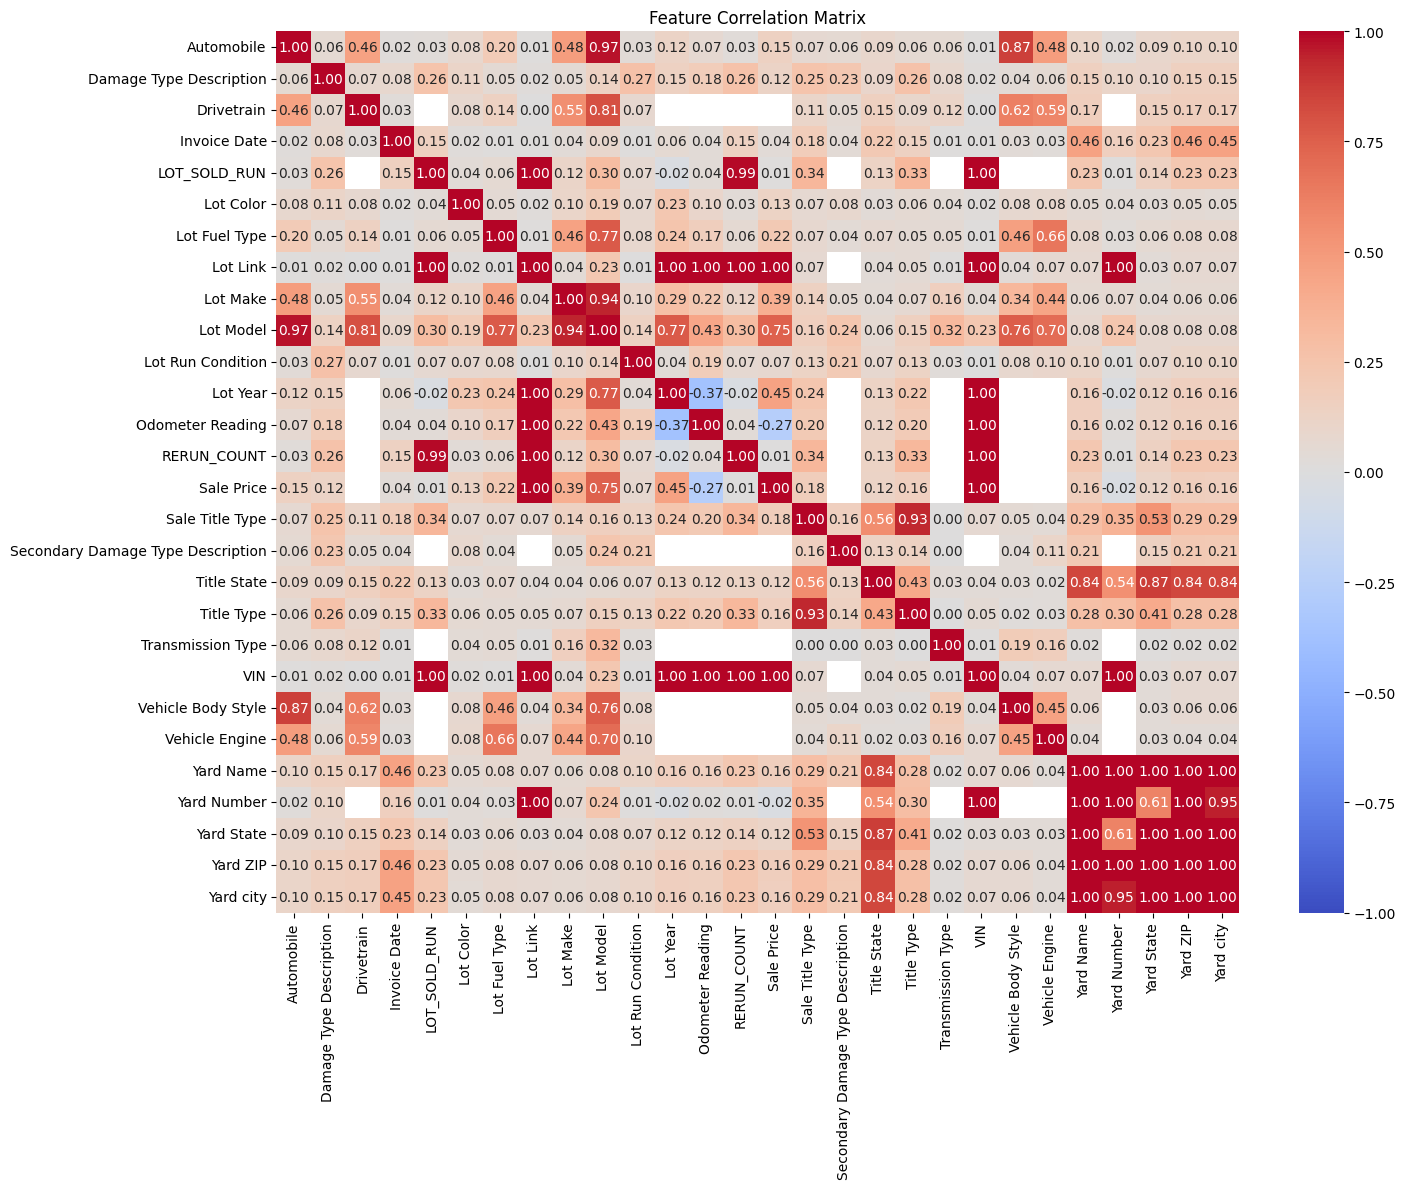


Top features correlated with Sale Price:
Sale Price                 1.000000
VIN                        1.000000
Lot Link                   1.000000
Lot Model                  0.747757
Lot Year                   0.454292
Lot Make                   0.389590
Odometer Reading          -0.265227
Lot Fuel Type              0.216450
Sale Title Type            0.175838
Yard Name                  0.164658
Yard ZIP                   0.164375
Title Type                 0.163294
Yard city                  0.162326
Automobile                 0.147149
Lot Color                  0.125743
Damage Type Description    0.121021
Title State                0.117272
Yard State                 0.117102
Lot Run Condition          0.071692
Invoice Date               0.038685
Name: Sale Price, dtype: float64


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
 
df = pd.read_csv("/Users/rajesh/Desktop/mathan_ali/mastan_madina_poc/sales_estimation/data.csv")
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
 
def corr_ratio(categorical, numerical):
    """Calculate correlation ratio for categorical-numerical association"""
    categories = categorical.unique()
    y_avg = numerical.mean()
    numerator = sum([(numerical[categorical == cat].mean() - y_avg)**2 * len(numerical[categorical == cat])
                   for cat in categories])
    denominator = sum((numerical - y_avg)**2)
    return np.sqrt(numerator/denominator) if denominator != 0 else 0
 
def feature_correlation(df):
    """Calculate all pairwise correlations between features"""
    # Separate features
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
   
    # Initialize correlation matrix
    corr_matrix = pd.DataFrame(index=numerical_cols.union(categorical_cols),
                              columns=numerical_cols.union(categorical_cols))
   
    # Numerical-Numerical (Pearson)
    num_corr = df[numerical_cols].corr()
    corr_matrix.loc[numerical_cols, numerical_cols] = num_corr
   
    # Categorical-Categorical (Cramer's V)
    for cat1 in categorical_cols:
        for cat2 in categorical_cols:
            corr_matrix.loc[cat1, cat2] = cramers_v(df[cat1], df[cat2])
   
    # Numerical-Categorical (Correlation Ratio)
    for num in numerical_cols:
        for cat in categorical_cols:
            corr_matrix.loc[num, cat] = corr_ratio(df[cat], df[num])
            corr_matrix.loc[cat, num] = corr_ratio(df[cat], df[num])
   
    return corr_matrix.astype(float)
 
# Calculate all correlations
correlation_matrix = feature_correlation(df)
 
# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()
 
# Display sorted correlations with 'Sale Price'
if 'Sale Price' in correlation_matrix.columns:
    price_correlations = correlation_matrix['Sale Price'].sort_values(key=abs, ascending=False)
    print("\nTop features correlated with Sale Price:")
    print(price_correlations.head(20))